# Lliurament tasca 6: Exercici 4

## Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

Aquesta llibreta és una versió resumida de la de la tasca 5 amb les visualitzacions integrades i separades amb separadors de línia, per tal de facilitar la correcció.

***
***
***

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## Exercici 1:

### Descarrega el data set [Airlines Delay: Airline on-time statistics and delay causes](https://www.kaggle.com/giovamata/airlinedelaycauses) i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('DelayedFlights.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


***

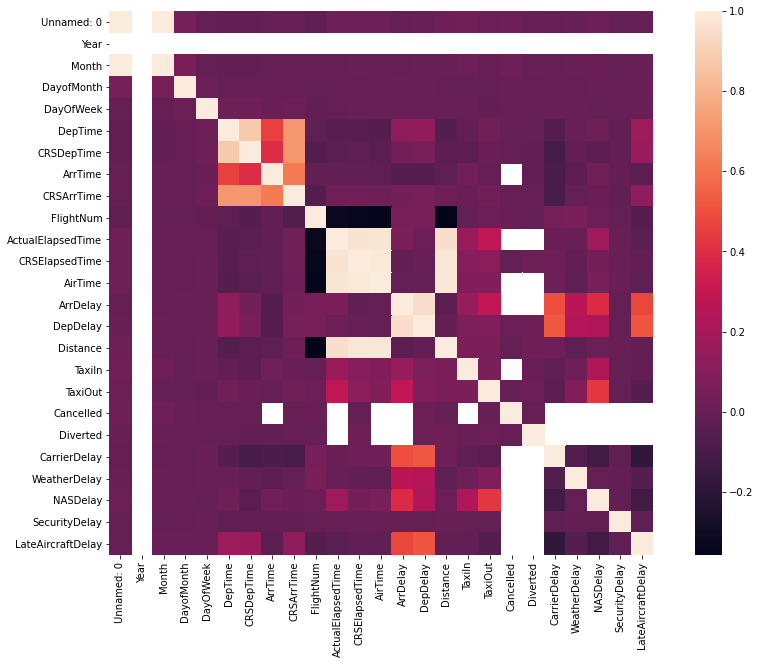

In [3]:
# Correlació entre les variables
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, square=True)
plt.show()

***

In [4]:
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,
                                    format='%Y%m%d')
df.drop(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
         'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 
         'CRSElapsedTime','DepDelay', 'TaxiIn', 'TaxiOut', 'CancellationCode',
        'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)
df.head()

,UniqueCarrier,ActualElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,Cancelled,Diverted,DepDate
0,WN,128.0,116.0,-14.0,IAD,TPA,810,0,0,2008-01-03
1,WN,128.0,113.0,2.0,IAD,TPA,810,0,0,2008-01-03
2,WN,96.0,76.0,14.0,IND,BWI,515,0,0,2008-01-03
3,WN,90.0,77.0,34.0,IND,BWI,515,0,0,2008-01-03
4,WN,101.0,87.0,11.0,IND,JAX,688,0,0,2008-01-03


***

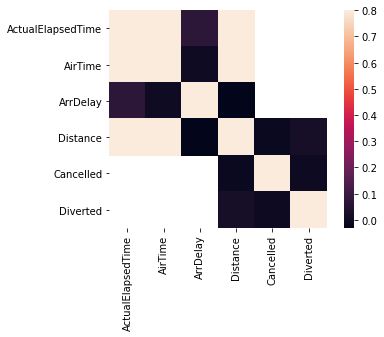

In [5]:
sns.heatmap(df.corr(), vmax=0.8, square=True)
plt.show()

***

## Exercici 2:

### Fes un informe complet del data set:

* **Resumeix estadísticament les columnes d’interès**

Un cop ja tenim el dataframe amb les columnes rellevants, procedirem a fer un resum estadístic bàsic, formatejant els floats per a una major claretat. 

Com que les columnes ``Cancelled`` i ``Diverted`` son booleanes (``1`` vol dir ``True`` i ``0`` vol dir ``False``), les exclourem.

In [6]:
pd.options.display.float_format = '{:,.2f}'.format
df[df.columns.difference(['Cancelled', 'Diverted'])].describe()

,ActualElapsedTime,AirTime,ArrDelay,Distance
count,"1,928,371.00","1,928,371.00","1,928,371.00","1,936,758.00"
mean,133.31,108.28,42.20,765.69
std,72.06,68.64,56.78,574.48
min,14.00,0.00,-109.00,11.00
25%,80.00,58.00,9.00,338.00
50%,116.00,90.00,24.00,606.00
75%,165.00,137.00,56.00,998.00
max,"1,114.00","1,091.00","2,461.00","4,962.00"


* **Troba quantes dades faltants hi ha per columna**

Per a trobar les dades faltants per columna, farem servir dues funcions, ``isna()`` i ``sum()``

In [7]:
df.isna().sum()

UniqueCarrier           0
ActualElapsedTime    8387
AirTime              8387
ArrDelay             8387
Origin                  0
Dest                    0
Distance                0
Cancelled               0
Diverted                0
DepDate                 0
dtype: int64

***

<AxesSubplot:title={'center':'% missing values'}>

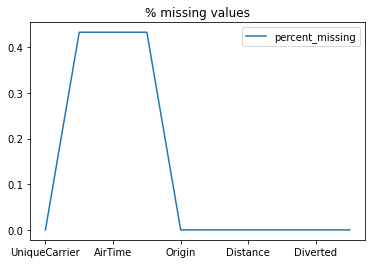

In [8]:
percent_missing = df.isna().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

missing_value_df.plot(title='% missing values')

Només falten un 0.4% de les dades en aquestes 3 columnes!

***

* **Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)**

Calcularem primer la velocitat mitjana, en milles per hora.

In [9]:
# En mph
df['AvgSpeed'] = df.Distance / (df.ActualElapsedTime/60)
df['AvgSpeed'].head()

0   379.69
1   379.69
2   321.88
3   343.33
4   408.71
Name: AvgSpeed, dtype: float64

A continuació, crearem una columna que ens indicarà si el vol ha arribat tard o no. Farem servir la mateixa convenció que utilitza el dataset en les columnes ``Cancelled`` i ``Diverted``, on ``0`` és ``False`` i ``1`` és ``True``

In [10]:
df['Delayed'] = np.where(df.ArrDelay > 0, 1, 0)
df['Delayed'].head()

0    0
1    1
2    1
3    1
4    1
Name: Delayed, dtype: int32

***

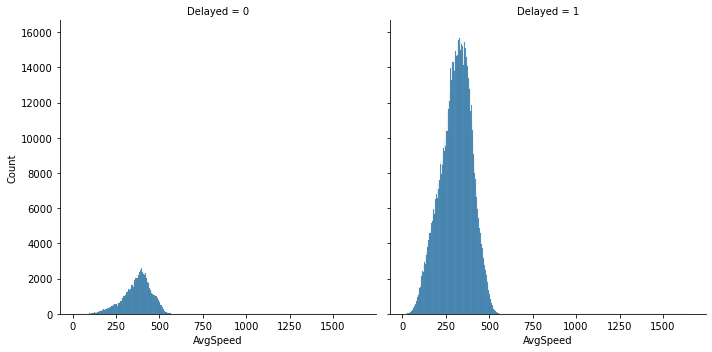

In [11]:
sns.displot(df, x='AvgSpeed', col='Delayed')

***

* **Taula de les aerolínies amb més endarreriments acumulats**

Per a aquesta informació podem fer servir la columna de UniqueCarrier. Però, com sabem quina aerolínia es quina? Ampliarem el nostre dataset fent servir dades adicionals, proveïdes per la [font del dataset original](http://stat-computing.org/dataexpo/2009/supplemental-data.html). Concretament, carregarem un arxiu csv amb els codis de cada aerolínia, anomenat ``carriers.csv``.

In [12]:
carriers = pd.read_csv('carriers.csv')
carriers.set_index('Code', inplace=True)
carriers.head()

,Description
Code,
02Q,Titan Airways
04Q,Tradewind Aviation
05Q,"Comlux Aviation, AG"
06Q,Master Top Linhas Aereas Ltd.
07Q,Flair Airlines Ltd.


In [13]:
# L'incorporarem al dataset que estàvem manipulant:
df = pd.merge(df, carriers, how='left', left_on='UniqueCarrier', right_on='Code')
df.rename(columns={'Description': 'Carrier'}, inplace=True)
df.drop('UniqueCarrier', axis=1, inplace=True)

Un cop tenim les dades necessàries, crearem una taula nova per a accedir a la informació que volem:

In [14]:
delays = df[['Delayed', 'Carrier']].copy()
delayed_carriers = delays.groupby('Carrier').aggregate(sum)
delayed_carriers.sort_values(by='Delayed', axis=0, ascending=False, inplace=True)

***

Text(0.5, 0, 'Number of delayed flights')

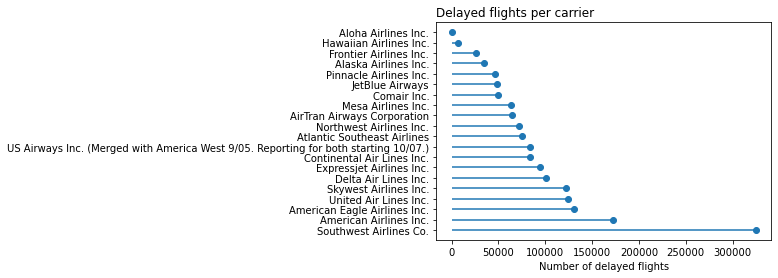

In [15]:
visualization_range = range(1, len(delayed_carriers.index) + 1)
x_values = [flight for flight in delayed_carriers['Delayed']]

plt.hlines(y=visualization_range, xmin=0, xmax=x_values)
plt.plot(x_values, visualization_range, "o")

plt.yticks(visualization_range, delayed_carriers.index)
plt.title('Delayed flights per carrier', loc='left')
plt.xlabel('Number of delayed flights')

Veiem que hi ha una de les aerolínies amb una explicació que ens està desajustant el tamany de la gràfica. Ho arreglarem de la següent manera:

In [16]:
longest_carrier_name = max(delayed_carriers.index, key=lambda k: len(k))
delayed_carriers.rename({longest_carrier_name: 'US Airways Inc.'}, axis=0, inplace=True)

I ara tornem a intentar-ho:

Text(0.5, 0, 'Number of delayed flights')

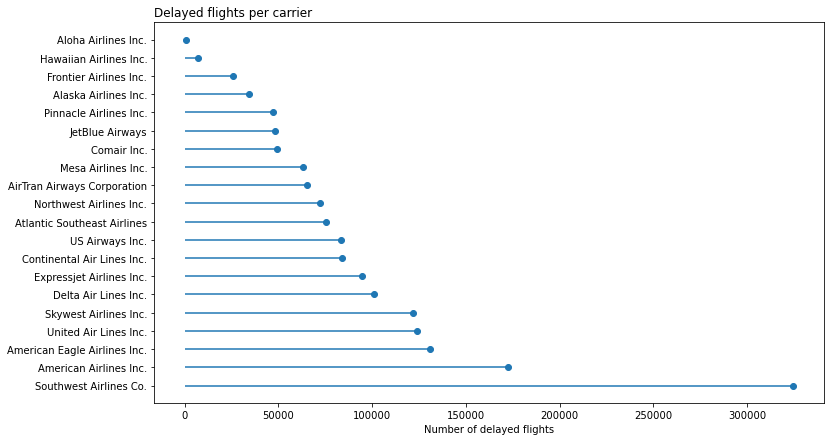

In [17]:
fig, ax = plt.subplots(figsize=(12, 7))

plt.hlines(y=visualization_range, xmin=0, xmax=x_values)
plt.plot(x_values, visualization_range, "o", figure=fig)

plt.yticks(visualization_range, delayed_carriers.index)
plt.title('Delayed flights per carrier', loc='left')
plt.xlabel('Number of delayed flights')

***

## Exercici 3

### Exporta el data set net i amb les noves columnes a Excel

Només ens queda endreçar una mica el dataset i exportar-lo a un nou arxiu csv.

In [18]:
df.columns

Index(['ActualElapsedTime', 'AirTime', 'ArrDelay', 'Origin', 'Dest',
       'Distance', 'Cancelled', 'Diverted', 'DepDate', 'AvgSpeed', 'Delayed',
       'Carrier'],
      dtype='object')

In [20]:
df = df[['DepDate', 'Origin', 'Dest', 'ActualElapsedTime', 'AirTime', 'Distance',
        'AvgSpeed', 'Cancelled', 'Diverted', 'Delayed', 'ArrDelay', 'Carrier']]
df.set_index('DepDate', inplace=True)
df.head()

,Origin,Dest,ActualElapsedTime,AirTime,Distance,AvgSpeed,Cancelled,Diverted,Delayed,ArrDelay,Carrier
DepDate,,,,,,,,,,,
2008-01-03,IAD,TPA,128.00,116.00,810,379.69,0,0,0,-14.00,Southwest Airlines Co.
2008-01-03,IAD,TPA,128.00,113.00,810,379.69,0,0,1,2.00,Southwest Airlines Co.
2008-01-03,IND,BWI,96.00,76.00,515,321.88,0,0,1,14.00,Southwest Airlines Co.
2008-01-03,IND,BWI,90.00,77.00,515,343.33,0,0,1,34.00,Southwest Airlines Co.
2008-01-03,IND,JAX,101.00,87.00,688,408.71,0,0,1,11.00,Southwest Airlines Co.


In [ ]:
df.to_csv('CleanDelayedFlights.csv')